In [1]:
import pandas as pd 
import numpy as np


In [2]:
df= pd.read_csv("/work/CavaCars.csv")

# Part 1 : cleaning data

In [3]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.shape

(5360, 33)

In [4]:
df.columns

Index(['Nom Voiture', 'Prix', 'Marque de voiture', 'Model', 'Année',
       'Carburant', 'Etat', 'Boîte de vitesse', 'Couleur', 'Puissance fiscale',
       'Cylindrée', 'Kilométrage', 'il y a 5 heures', 'il y a 9 jours',
       'il y a 11 jours', 'il y a 12 jours', 'il y a 22 jours',
       'il y a 21 jours', 'il y a un mois', 'il y a 25 jours', 'il y a 2 mois',
       'il y a 10 jours', 'il y a 3 mois', 'il y a 13 jours', 'il y a 4 mois',
       'il y a 5 mois', 'il y a 6 mois', 'il y a 7 mois', 'il y a 8 mois',
       'il y a 5 jours', 'il y a 9 mois', 'il y a 10 mois', 'il y a un an'],
      dtype='object')

In [5]:
df = df.iloc[:, :12]
df.columns

Index(['Nom Voiture', 'Prix', 'Marque de voiture', 'Model', 'Année',
       'Carburant', 'Etat', 'Boîte de vitesse', 'Couleur', 'Puissance fiscale',
       'Cylindrée', 'Kilométrage'],
      dtype='object')

In [6]:
newCols = {'Nom Voiture':'Car_Name','Prix':'Price','Année':'Year','Marque de voiture':'Brand','Carburant':'Fuel_Type','Boîte de vitesse':'Transmission','Couleur':'Color','Puissance fiscale':'Horse_power','Cylindrée':'Cylinder','Kilométrage':'Mileage','Etat':'Status'}
df.rename(columns=newCols, inplace=True)
ordered_columns = [
    'Car_Name', 'Brand', 'Model', 'Status', 'Year', 
    'Fuel_Type', 'Transmission', 'Horse_power', 
    'Cylinder', 'Mileage', 'Color', 'Price'
]
df = df[ordered_columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5360 entries, 0 to 5359
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car_Name      5360 non-null   object 
 1   Brand         5331 non-null   object 
 2   Model         5274 non-null   object 
 3   Status        5344 non-null   object 
 4   Year          5337 non-null   float64
 5   Fuel_Type     5324 non-null   object 
 6   Transmission  5337 non-null   object 
 7   Horse_power   5323 non-null   float64
 8   Cylinder      5323 non-null   object 
 9   Mileage       5336 non-null   float64
 10  Color         5323 non-null   object 
 11  Price         4284 non-null   object 
dtypes: float64(3), object(9)
memory usage: 502.6+ KB


In [7]:
df.columns

Index(['Car_Name', 'Brand', 'Model', 'Status', 'Year', 'Fuel_Type',
       'Transmission', 'Horse_power', 'Cylinder', 'Mileage', 'Color', 'Price'],
      dtype='object')

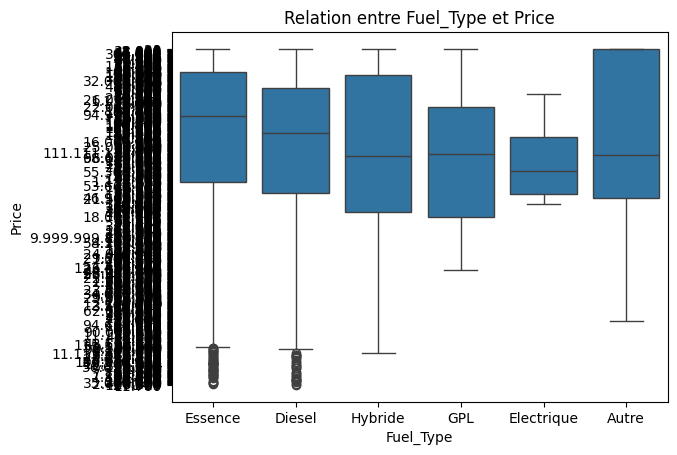

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df, x='Fuel_Type', y='Price')
plt.title("Relation entre Fuel_Type et Price")
plt.show()

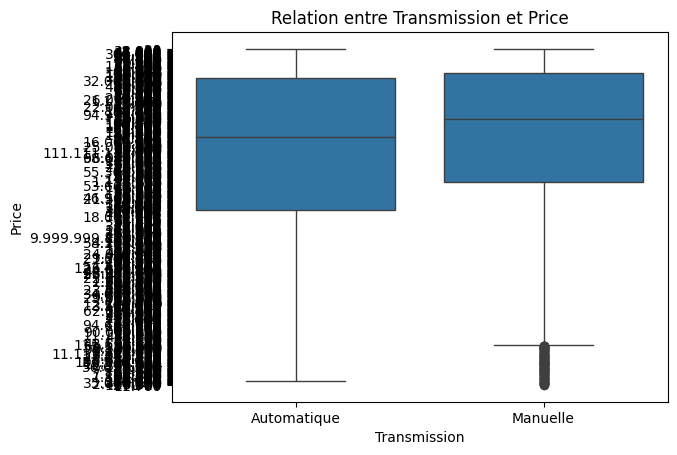

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df, x='Transmission', y='Price')
plt.title("Relation entre Transmission et Price")
plt.show()

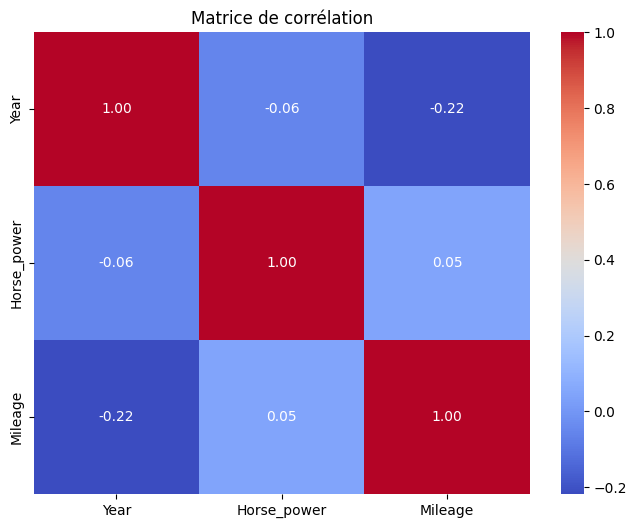

In [10]:
# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=['number']).columns
corr = df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

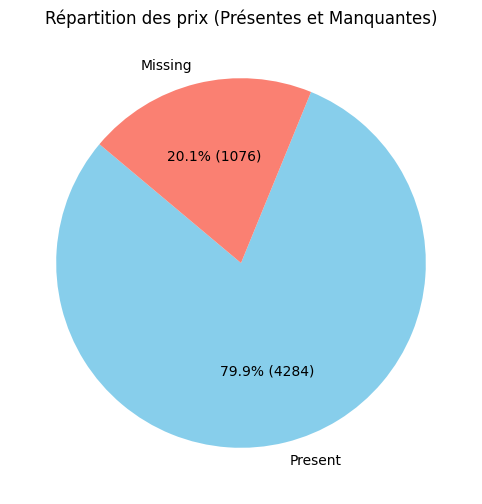

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column to indicate presence or absence of 'Brand'
df['pr_Status'] = df['Price'].apply(lambda x: 'Present' if pd.notnull(x) else 'Missing')

# Count the occurrences of each status
pr_status_counts = df['pr_Status'].value_counts()

# Define the custom autopct function to display both percentages and counts
def autopct_with_counts(pct, all_vals):
    absolute = int(round(pct/100. * sum(all_vals)))
    return f'{pct:.1f}% ({absolute})'

# Pie chart with counts and percentages
plt.figure(figsize=(8, 6))
plt.pie(
    pr_status_counts,
    labels=pr_status_counts.index,
    autopct=lambda pct: autopct_with_counts(pct, pr_status_counts.values),
    colors=['skyblue', 'salmon'],
    startangle=140
)
plt.title("Répartition des prix (Présentes et Manquantes)")
plt.show()


In [12]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0).astype(int)
df['Price'].describe()

count    5.360000e+03
mean    -1.720778e+15
std      1.259817e+17
min     -9.223372e+18
25%      1.000000e+00
50%      2.700000e+01
75%      4.300000e+01
max      9.990000e+02
Name: Price, dtype: float64

In [124]:
#visualiser les prix >=150
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Price'] >= 150.000.000]['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution des prix (superieures à 150)')
plt.xlabel('Prix (en unités)')
plt.ylabel('Nombre de voitures')
plt.show()

SyntaxError: invalid syntax (3476650859.py, line 4)

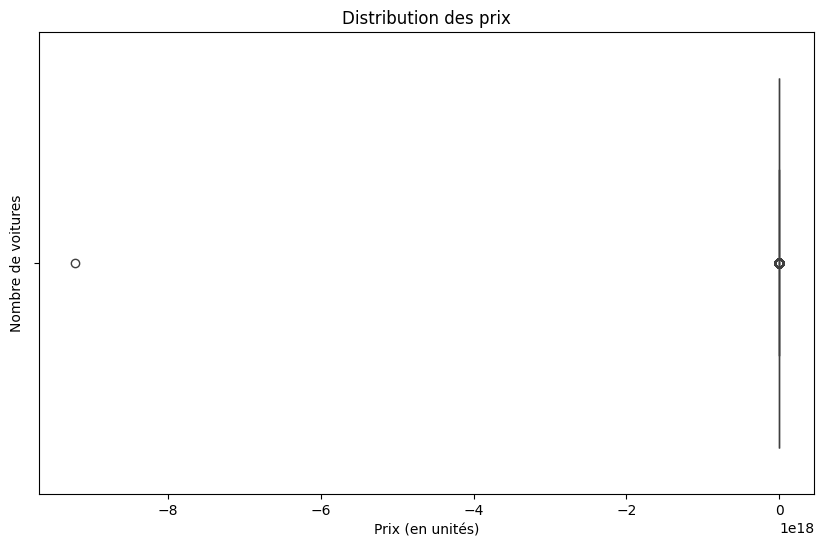

In [120]:
#visualiser la distribution des prix avec boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Distribution des prix')
plt.xlabel('Prix (en unités)')
plt.ylabel('Nombre de voitures')
plt.show()

In [128]:
df[df['Price'] == 999.000]

,Car_Name,Brand,Model,Status,Year,Fuel_Type,Transmission,Horse_power,Cylinder,Mileage,Color,Price,pr_Status,km_interval,year_interval
1385,Hyundai grand i10,Hyundai,I10,Occasion,2014.0,Essence,Manuelle,5.0,1.2,268000.0,orange,999,Present,200K-500K,2010-2019
5000,Usuzu 10ch,Isuzu,Autres,Occasion,1997.0,Diesel,Manuelle,10.0,1.6,999.0,blanc,999,Present,0-10K,2000-2009


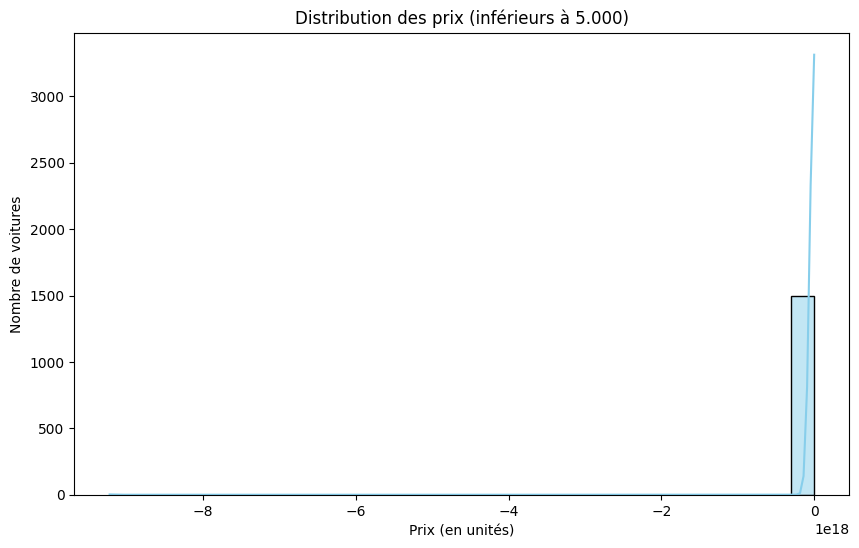

In [86]:
# Filtrer les données pour les prix < 5000
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0).astype(int)

df_filtered = df[df['Price'] < 5.000]

# 1. Histogramme
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution des prix (inférieurs à 5.000)')
plt.xlabel('Prix (en unités)')
plt.ylabel('Nombre de voitures')
plt.show()


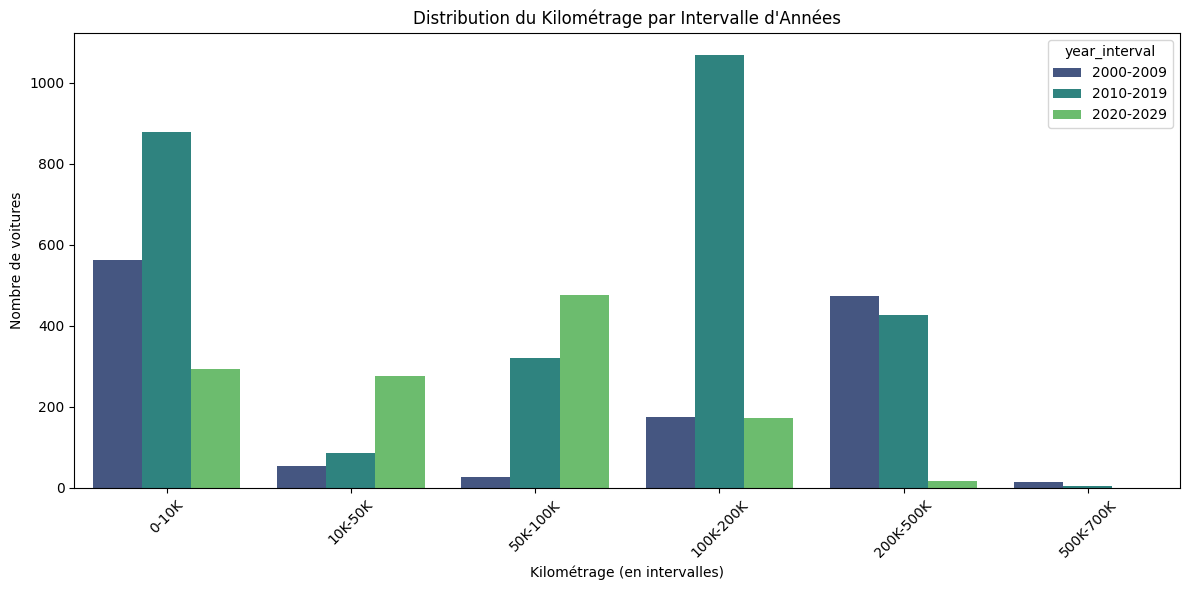

In [14]:
bins_mileage = [0, 10000, 50000, 100000, 200000, 500000, 700000]
labels_mileage = ['0-10K', '10K-50K', '50K-100K', '100K-200K', '200K-500K', '500K-700K']
df['km_interval'] = pd.cut(df['Mileage'], bins=bins_mileage, labels=labels_mileage, right=False)

# Définir les intervalles d'années (par décennie)
bins_year = [df['Year'].min(), 2010, 2020, 2030]  # Vous pouvez ajuster en fonction de votre dataset
labels_year = ['2000-2009', '2010-2019', '2020-2029']  # Assurez-vous que cela couvre vos données
df['year_interval'] = pd.cut(df['Year'], bins=bins_year, labels=labels_year, right=False)

# Visualiser la distribution du kilométrage et des années
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='km_interval', hue='year_interval', palette='viridis')
plt.title('Distribution du Kilométrage par Intervalle d\'Années')
plt.xlabel('Kilométrage (en intervalles)')
plt.ylabel('Nombre de voitures')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
df_clean=df.drop_duplicates()
# Supprimer les lignes où 'Model' est null
df_clean = df_clean[~df_clean['Model'].isnull()]

# Afficher un aperçu après suppression
df_clean

,Car_Name,Brand,Model,Status,Year,Fuel_Type,Transmission,Horse_power,Cylinder,Mileage,Color,Price,pr_Status,km_interval,year_interval
0,Kia sportage,Kia,Sportage,Occasion,2017.0,Essence,Automatique,8.0,1.6,166000.0,kaki,0,Missing,100K-200K,2010-2019
1,Citroen GS spécial,Citroen,Gsa,Occasion,1975.0,Essence,Manuelle,6.0,1.6,333.0,blanc,20,Present,0-10K,2000-2009
2,Hyundai Tucson,Hyundai,Tucson,Occasion,2022.0,Essence,Manuelle,8.0,1.6,60000.0,bleu,0,Missing,50K-100K,2020-2029
3,Polo 8 1er main,Volkswagen,Polo,Neuf,2022.0,Essence,Manuelle,4.0,1.2,80000.0,blanc,1,Present,50K-100K,2020-2029
4,BMW E24,Bmw,Autre,Occasion,1985.0,Essence,Manuelle,14.0,1.6,240000.0,gris,0,Missing,200K-500K,2000-2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5355,Mazda bt50 hi,Mazda,Aures,Occasion,2017.0,Diesel,Manuelle,9.0,2.8,155000.0,marron,65,Present,100K-200K,2010-2019
5356,Fiat fiorino,Fiat,Fiorino,Occasion,2018.0,Diesel,Manuelle,5.0,1.6,270000.0,blanc,21,Present,200K-500K,2010-2019
5357,غار الدماء,Peugeot,Autres,Occasion,2016.0,Diesel,Manuelle,33.0,1.6,107.0,blanc,33,Present,0-10K,2010-2019
5358,C3 2003 moteur jdid,Citroen,C3,Occasion,2003.0,Essence,Manuelle,4.0,1.2,290.0,bleu,18,Present,0-10K,2000-2009


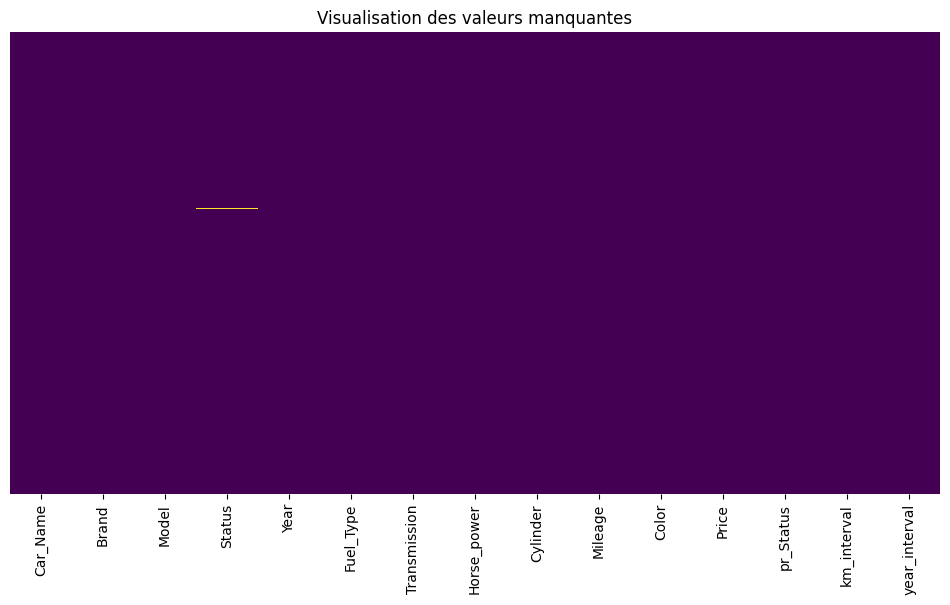

In [16]:
# Visualiser les valeurs manquantes avec un heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_clean.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Visualisation des valeurs manquantes")
plt.show()

In [17]:
# Trier le DataFrame par la colonne 'Price' de manière ascendante
df_sorted = df_clean.sort_values(by='Price', ascending=False)

# Afficher les 10 premières lignes pour vérifier
df_sorted

,Car_Name,Brand,Model,Status,Year,Fuel_Type,Transmission,Horse_power,Cylinder,Mileage,Color,Price,pr_Status,km_interval,year_interval
1385,Hyundai grand i10,Hyundai,I10,Occasion,2014.0,Essence,Manuelle,5.0,1.2,268000.0,orange,999,Present,200K-500K,2010-2019
5000,Usuzu 10ch,Isuzu,Autres,Occasion,1997.0,Diesel,Manuelle,10.0,1.6,999.0,blanc,999,Present,0-10K,2000-2009
1763,Tayota,Toyota,Autres,Neuf,2013.0,Autre,Manuelle,4.0,>4.0,220.0,noir,888,Present,0-10K,2010-2019
1660,Hyundai Grand i10,Hyundai,I10,Neuf,2021.0,Essence,Manuelle,5.0,1.2,82.0,blanc,444,Present,0-10K,2020-2029
3606,Toyota yaris élégance,Toyota,Yaris,Occasion,2015.0,Essence,Manuelle,5.0,1.2,44000.0,rouge,444,Present,10K-50K,2010-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,Golf 7,Volkswagen,Golf,Occasion,2019.0,Essence,Automatique,6.0,1.2,95000.0,blanc,0,Missing,50K-100K,2010-2019
7,Golf 8,Volkswagen,Golf,Occasion,2021.0,Essence,Manuelle,6.0,1.0,82000.0,bleu,0,Missing,50K-100K,2020-2029
6,Audi A3,Audi,Audi A3,Occasion,2016.0,Essence,Manuelle,6.0,1.0,60000.0,noir,0,Missing,50K-100K,2010-2019
5,Hyundai Tucson,Hyundai,Tucson,Occasion,2022.0,Diesel,Automatique,7.0,1.6,42000.0,gris,0,Missing,10K-50K,2020-2029


In [18]:
df_clean[df_clean['Price'].isnull()].count()

Car_Name         0
Brand            0
Model            0
Status           0
Year             0
Fuel_Type        0
Transmission     0
Horse_power      0
Cylinder         0
Mileage          0
Color            0
Price            0
pr_Status        0
km_interval      0
year_interval    0
dtype: int64

In [19]:
#afficher les vouilles dont le prix superieurs à 150.000
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')
df_clean[df_clean['Price'] > 150.000]

,Car_Name,Brand,Model,Status,Year,Fuel_Type,Transmission,Horse_power,Cylinder,Mileage,Color,Price,pr_Status,km_interval,year_interval
29,Partner sous leasing,Peugeot,Partner,Occasion,2020.0,Diesel,Manuelle,5.0,1.6,100000.0,blanc,300,Present,100K-200K,2020-2029
189,CLIO 4 LIFE PREMIÈRE MAIN TRÈS PROPRE,Renault,Clio,Occasion,2021.0,Essence,Manuelle,5.0,1.2,67000.0,noir,410,Present,50K-100K,2020-2029
264,C3 série 152,Citroen,C3,Occasion,2012.0,Essence,Manuelle,5.0,1.4,330.0,noir,240,Present,0-10K,2010-2019
334,Voiture rang rover sport à vendre,Land Rover,Range Rover,Occasion,2017.0,Diesel,Automatique,15.0,2.0,170000.0,noir,195,Present,100K-200K,2010-2019
395,TOYOTA HILUX,Toyota,Hilux,Neuf,2017.0,Diesel,Automatique,8.0,2.4,230000.0,noir,166,Present,200K-500K,2010-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,Toyota hilux,Toyota,Autres,Occasion,2019.0,Diesel,Automatique,8.0,2.4,193000.0,gris,162,Present,100K-200K,2010-2019
5190,A vendre,Fiat,Doblo,Occasion,2016.0,Diesel,Manuelle,5.0,1.4,99878.0,blanc,195,Present,50K-100K,2010-2019
5232,GOLF 8 kit gtd,Volkswagen,Golf,Occasion,2020.0,Diesel,Automatique,8.0,2.0,48000.0,blanc,155,Present,10K-50K,2020-2029
5252,C 4 ANNEE 2010,Citroen,C4,Occasion,2010.0,Diesel,Manuelle,6.0,1.6,410000.0,gris,222,Present,200K-500K,2010-2019


/tmp/ipykernel_74/227815032.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Price_Bin'] = pd.cut(filtered_df['Price'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_74/227815032.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price_Bin', data=filtered_df, palette='Blues_d')


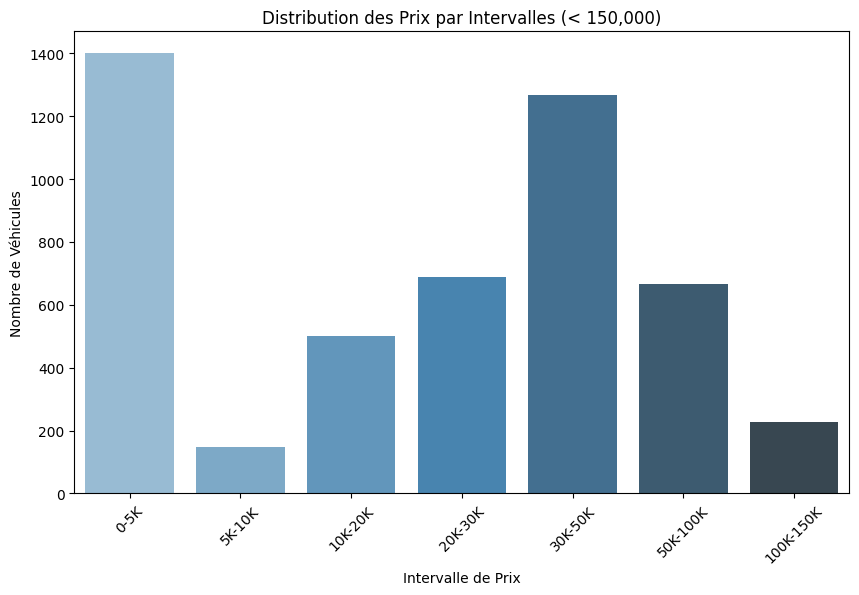

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filtrer les voitures avec un prix inférieur à 150,000
filtered_df = df_clean[df_clean['Price'] < 150.000]

# Définir les intervalles pour les prix
bins = [0, 5.000, 10.000, 20.000, 30.000, 50.000, 100.000, 150.000]
labels = ['0-5K', '5K-10K', '10K-20K', '20K-30K', '30K-50K', '50K-100K', '100K-150K']

# Créer une nouvelle colonne 'Price_Bin' avec les intervalles
filtered_df['Price_Bin'] = pd.cut(filtered_df['Price'], bins=bins, labels=labels, right=False)

# Visualiser la distribution des prix par intervalle
plt.figure(figsize=(10, 6))
sns.countplot(x='Price_Bin', data=filtered_df, palette='Blues_d')
plt.title('Distribution des Prix par Intervalles (< 150,000)')
plt.xlabel('Intervalle de Prix')
plt.ylabel('Nombre de Véhicules')
plt.xticks(rotation=45)
plt.show()


In [21]:
filtered_df = df_clean[df_clean['Price'] <= 5.000]

filtered_df


,Car_Name,Brand,Model,Status,Year,Fuel_Type,Transmission,Horse_power,Cylinder,Mileage,Color,Price,pr_Status,km_interval,year_interval
0,Kia sportage,Kia,Sportage,Occasion,2017.0,Essence,Automatique,8.0,1.6,166000.0,kaki,0,Missing,100K-200K,2010-2019
2,Hyundai Tucson,Hyundai,Tucson,Occasion,2022.0,Essence,Manuelle,8.0,1.6,60000.0,bleu,0,Missing,50K-100K,2020-2029
3,Polo 8 1er main,Volkswagen,Polo,Neuf,2022.0,Essence,Manuelle,4.0,1.2,80000.0,blanc,1,Present,50K-100K,2020-2029
4,BMW E24,Bmw,Autre,Occasion,1985.0,Essence,Manuelle,14.0,1.6,240000.0,gris,0,Missing,200K-500K,2000-2009
5,Hyundai Tucson,Hyundai,Tucson,Occasion,2022.0,Diesel,Automatique,7.0,1.6,42000.0,gris,0,Missing,10K-50K,2020-2029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5321,Volkswagen Polo 6,Volkswagen,Polo,Occasion,2009.0,Essence,Manuelle,4.0,1.2,163000.0,noir,0,Missing,100K-200K,2000-2009
5327,Geely 1ère main en très bon état,Geely,GK-GL,Occasion,2020.0,Essence,Manuelle,6.0,1.5,30000.0,blanc,1,Present,10K-50K,2020-2029
5348,Sidi hssin,Fiat,Autres,Occasion,1998.0,Diesel,Manuelle,7.0,2.9,632.0,gris,5,Present,0-10K,2000-2009
5350,DfM S50 neuve,Mitsubishi,Lancer,Occasion,2020.0,Essence,Manuelle,6.0,1.5,57000.0,blanc,0,Missing,50K-100K,2020-2029


In [22]:
#suppression des lignes dont les prix entre [5.000, 150.000]
df_clean = df_clean[(df_clean['Price'] >= 5.000) & (df_clean['Price'] <= 150.000)]

In [23]:
import pandas as pd
import numpy as np

# Fonction pour regrouper les données avec une contrainte sur la différence des années
def group_and_fill_nan_prices(df):
    # Liste pour stocker les groupes temporaires
    updated_rows = []
    
    # Grouper par Brand, Model, Status
    for (brand, model, status), group in df.groupby(['Brand', 'Model', 'Status']):
        # Trier par année pour simplifier les comparaisons
        group = group.sort_values(by='Year').reset_index(drop=True)
        
        # Créer des sous-groupes où la différence d'années est au maximum de 5 ans
        sub_group = [group.iloc[0]]  # Le premier élément initialise le sous-groupe
        for i in range(1, len(group)):
            if abs(group.iloc[i]['Year'] - sub_group[0]['Year']) <= 5:
                sub_group.append(group.iloc[i])
            else:
                # Traiter le sous-groupe courant
                sub_group_df = pd.DataFrame(sub_group)
                price_mean = sub_group_df['Price'].mean()  # Moyenne des prix non-NaN
                sub_group_df['Price'] = sub_group_df['Price'].fillna(price_mean)  # Remplir NaN
                updated_rows.append(sub_group_df)
                sub_group = [group.iloc[i]]  # Redémarrer un nouveau sous-groupe
        
        # Traiter le dernier sous-groupe
        sub_group_df = pd.DataFrame(sub_group)
        price_mean = sub_group_df['Price'].mean()
        sub_group_df['Price'] = sub_group_df['Price'].fillna(price_mean)
        updated_rows.append(sub_group_df)
    
    # Combiner tous les groupes mis à jour
    return pd.concat(updated_rows, ignore_index=True)

# Appliquer la fonction
df_clean = group_and_fill_nan_prices(df_clean)


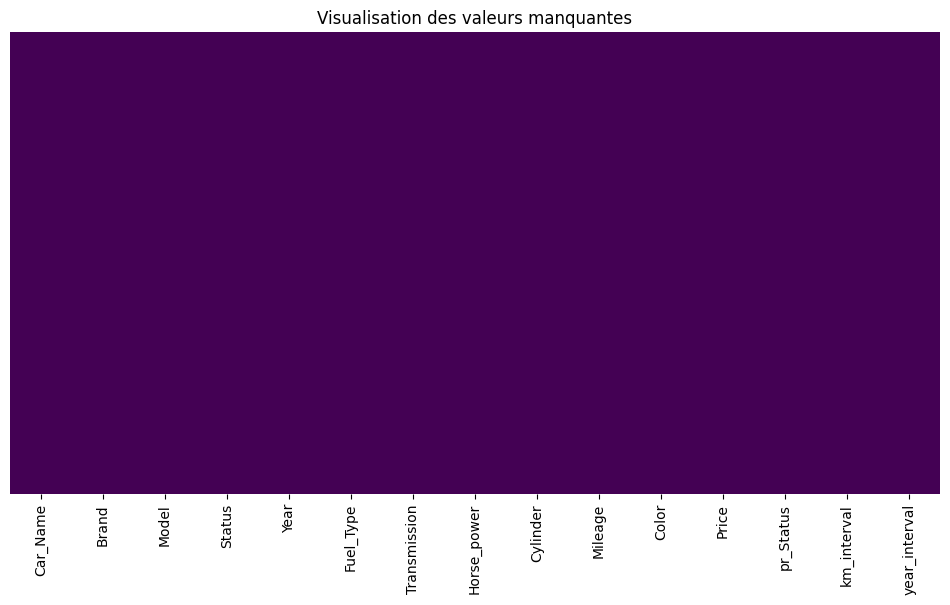

In [24]:
# Visualiser les valeurs manquantes avec un heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_clean.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Visualisation des valeurs manquantes")
plt.show()

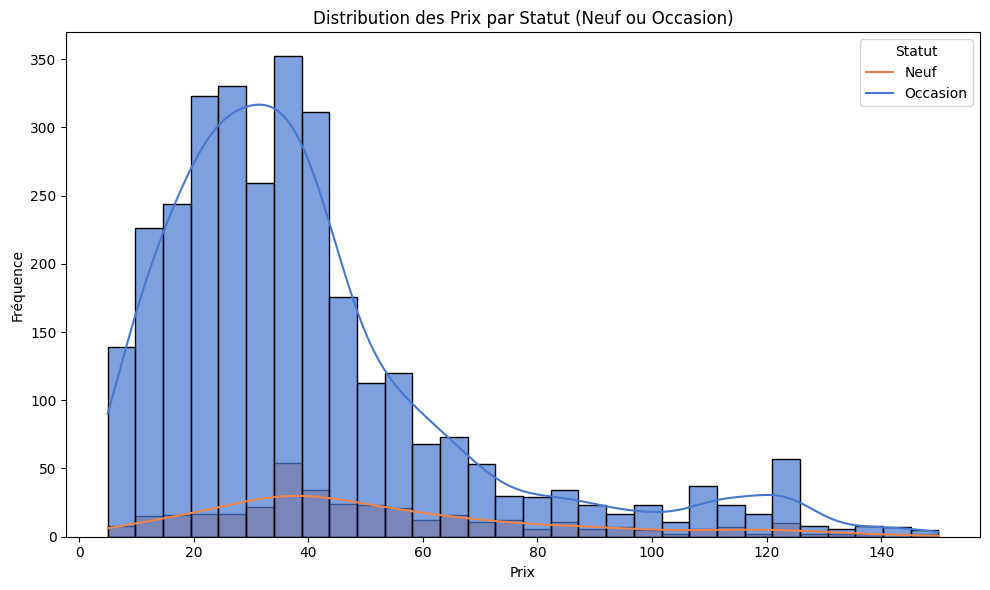

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vérifier que la colonne "Status" est standardisée
df_clean['Status'] = df_clean['Status'].str.lower()  # Convertir les statuts en minuscules

# Filtrer les données pour exclure les prix NaN
filtered_data = df_clean.dropna(subset=['Price'])

# Tracé de l'histogramme avec la séparation des statuts
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x="Price", hue="Status", kde=True, bins=30, palette="muted", alpha=0.7)
plt.title("Distribution des Prix par Statut (Neuf ou Occasion)")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.legend(title="Statut", labels=["Neuf", "Occasion"])
plt.tight_layout()
plt.show()


In [26]:
#import new dataset
NewDF=pd.read_csv("/work/DatasetPartiallyCleanedManually.csv")
NewDF

,Car_Name,Brand,Model,Status,Year,Fuel_Type,Transmission,Horse_power,Cylinder,Mileage,Color,Price
0,alfa romeo 156 à echange ou vendre,Alfa Romeo,156,occasion,2000.0,Essence,Manuelle,8.0,1.8,300000.0,noir,111.11
1,Alfa Romeo 159,Alfa Romeo,159,occasion,2008.0,Diesel,Manuelle,6.0,1.9,200000.0,noir,26.50
2,Giulietta,Alfa Romeo,Giulietta,occasion,2015.0,Essence,Manuelle,7.0,1.4,180.0,noir,38.00
3,Alfa Giulietta,Alfa Romeo,Giulietta,occasion,2015.0,Essence,Automatique,9.0,1.4,182000.0,rouge,43.00
4,2010 Alfa Romeo MiTo quadrifoglio,Alfa Romeo,Mito,occasion,2010.0,Essence,Manuelle,9.0,1.4,150000.0,violet,36.90
...,...,...,...,...,...,...,...,...,...,...,...,...
3492,Vento tayara,Volkswagen,Vento,occasion,1994.0,Diesel,Manuelle,6.0,1.2,22865.0,noir,16.30
3493,Bonne occasion,Volkswagen,Vento,occasion,1995.0,Diesel,Manuelle,5.0,1.2,60000.0,blanc,13.00
3494,À vendre Volvo S40,Volvo,S40,occasion,2009.0,Essence,Manuelle,6.0,1.0,243298.0,bleu,23.00
3495,Particulier vent sa Volvo s60,Volvo,S60,occasion,2014.0,Essence,Manuelle,8.0,1.6,186000.0,noir,37.50


In [27]:
#Effacer les lignes redoublantes de NewDF
NewDF=NewDF.drop_duplicates()
NewDF[NewDF.duplicated(keep=False)]


,Car_Name,Brand,Model,Status,Year,Fuel_Type,Transmission,Horse_power,Cylinder,Mileage,Color,Price


In [28]:
# Compter les valeurs dans la colonne Brand qui sont NaN ou des variantes de "Autre"
missing_or_other_count = NewDF['Brand'].apply(
    lambda x: pd.isnull(x) or str(x).lower() in ['autre', 'autres']
).sum()


print(f"Nombre de valeurs dans 'Brand' égales à NaN ou des variantes de 'Autre' : {missing_or_other_count}")


#afficher les lignes dont la valeur de brand est nan ou autre ou autres ou Autre ou Autres
NewDF[NewDF['Brand'].apply(
    lambda x: pd.isnull(x) or str(x).lower() in ['autre', 'autres']
)]

Nombre de valeurs dans 'Brand' égales à NaN ou des variantes de 'Autre' : 11


,Car_Name,Brand,Model,Status,Year,Fuel_Type,Transmission,Horse_power,Cylinder,Mileage,Color,Price
82,Sss,Autres,Autres,neuf,2013.0,Diesel,Manuelle,10.0,2.5,260000.0,rouge,68.000
89,Voiture à vendre,Autres,Autres,occasion,1991.0,Essence,Manuelle,7.0,1.3,0.0,rouge,8.500
90,A vendre Traktour,Autres,Autres,occasion,1993.0,Diesel,Manuelle,6.0,>4.0,0.0,vert,38.000
92,Vendre,Autres,Autres,occasion,1999.0,Essence,Manuelle,4.0,1.0,200.0,bleu,18.500
97,25 aout 2024,Autres,Autres,occasion,2006.0,Essence,Manuelle,7.0,1.4,16806.0,noir,23.000
101,Voiture à vendre,Autres,Autres,occasion,2012.0,Diesel,Manuelle,36.0,>4.0,260.0,blanc,55.000
109,A,Autres,Autres,occasion,2018.0,Diesel,Manuelle,9.0,>4.0,84000.0,noir,111.111
112,A Vendre,Autres,Autres,occasion,2019.0,Essence,Manuelle,4.0,1.2,30000.0,violet,42.500
126,22801802,Autres,Autres,occasion,2021.0,Essence,Automatique,9.0,1.5,25000.0,noir,91.500
128,A,Autres,Autres,occasion,2022.0,Essence,Automatique,5.0,1.1,199.0,Autres,110.000


In [29]:
#effacer les lignes dont la valeur de brand est nan ou autre ou autres ou Autre ou Autres
NewDF=NewDF[~NewDF['Brand'].apply(
    lambda x: pd.isnull(x) or str(x).lower() in ['autre', 'autres']
)]
# Compter les valeurs dans la colonne Model qui sont NaN ou des variantes de "Autre"
missing_or_other_count = NewDF['Brand'].apply(
    lambda x: pd.isnull(x) or str(x).lower() in ['autre', 'autres']
).sum()


print(f"Nombre de valeurs dans 'Brand' égales à NaN ou des variantes de 'Autre' : {missing_or_other_count}")

Nombre de valeurs dans 'Brand' égales à NaN ou des variantes de 'Autre' : 0


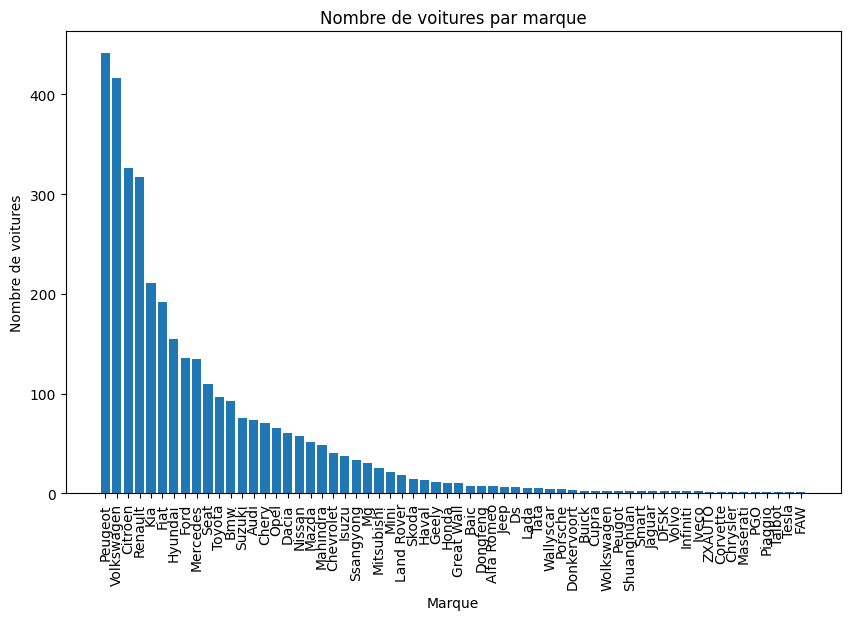

In [30]:
#generer un chart sur tous les brands presentes dans NewDF
import matplotlib.pyplot as plt

# Compter le nombre de chaque marque
brand_counts = NewDF['Brand'].value_counts()

#je veux visualiser tous les brands clairement sur un grand chart
plt.figure(figsize=(10, 6))
plt.bar(brand_counts.index, brand_counts.values)
plt.xlabel('Marque')
plt.ylabel('Nombre de voitures')
plt.title('Nombre de voitures par marque')
plt.xticks(rotation=90)
plt.show()

In [31]:
#changer les valeurs Wolkswagen en Volkswagen dans la colonne Brand
NewDF['Brand'] = NewDF['Brand'].replace('Wolkswagen', 'Volkswagen')
#changer Peugot en Peugeot dans la colonne Brand
NewDF['Brand'] = NewDF['Brand'].replace('Peugot', 'Peugeot')

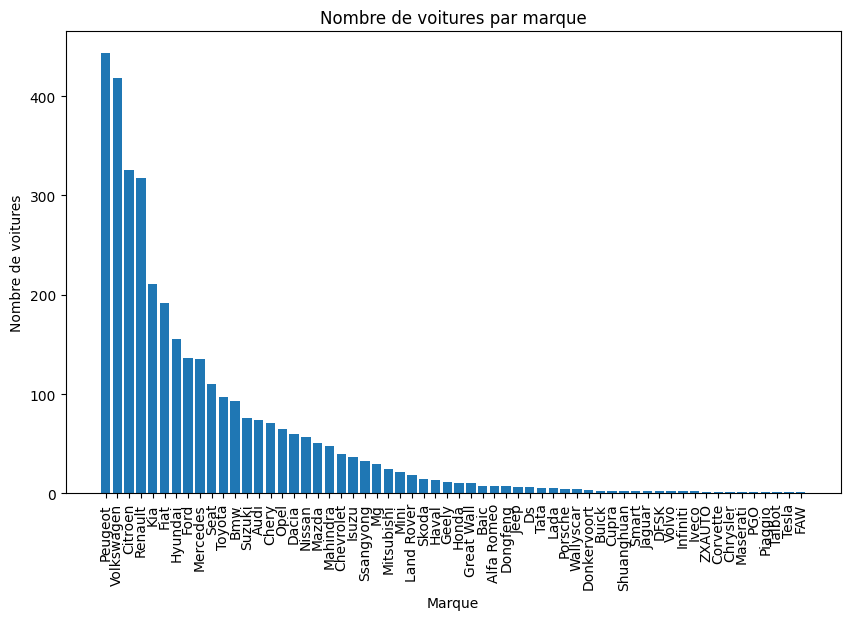

In [32]:
#generer un chart sur tous les brands presentes dans NewDF
import matplotlib.pyplot as plt

# Compter le nombre de chaque marque
brand_counts = NewDF['Brand'].value_counts()

#je veux visualiser tous les brands clairement sur un grand chart
plt.figure(figsize=(10, 6))
plt.bar(brand_counts.index, brand_counts.values)
plt.xlabel('Marque')
plt.ylabel('Nombre de voitures')
plt.title('Nombre de voitures par marque')
plt.xticks(rotation=90)
plt.show()

In [33]:
# Compter les valeurs dans la colonne Model qui sont NaN ou des variantes de "Autre"
missing_or_other_count = NewDF['Model'].apply(
    lambda x: pd.isnull(x) or str(x).lower() in ['autre', 'autres']
).sum()


print(f"Nombre de valeurs dans 'Model' égales à NaN ou des variantes de 'Autre' : {missing_or_other_count}")


#afficher les lignes dont la valeur de brand est nan ou autre ou autres ou Autre ou Autres
NewDF[NewDF['Model'].apply(
    lambda x: pd.isnull(x) or str(x).lower() in ['autre', 'autres']
)]

Nombre de valeurs dans 'Model' égales à NaN ou des variantes de 'Autre' : 70


,Car_Name,Brand,Model,Status,Year,Fuel_Type,Transmission,Horse_power,Cylinder,Mileage,Color,Price
93,Peugeot,Peugeot,Autres,occasion,2000.0,Essence,Manuelle,6.0,1.4,142129.0,rouge,111.0
107,Chery,Chery,Autres,occasion,2017.0,Essence,Manuelle,4.0,1.2,81.0,gris,20.7
122,Chery à vendre,Chery,Autres,occasion,2020.0,Essence,Manuelle,4.0,1.0,37000.0,noir,26.0
139,NaN,Bmw,Autre,occasion,2011.0,Essence,Manuelle,6.0,1.6,162000.0,gris,46.0
302,Normal,Chevrolet,Autres,occasion,2015.0,Essence,Manuelle,5.0,1.4,160000.0,noir,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2980,Voiture Automobile Utilitaire,Toyota,Autres,occasion,1998.0,Essence,Manuelle,14.0,2.9,232000.0,noir,30.5
2981,voiture toyota a vendre,Toyota,Autres,occasion,2000.0,Essence,Manuelle,5.0,1.2,400000.0,blanc,10.0
2982,Toyota,Toyota,Autres,occasion,2011.0,Diesel,Manuelle,10.0,2.0,236000.0,blanc,123.0
3080,Kebili,Volkswagen,Autres,occasion,2001.0,Essence,Manuelle,5.0,1.4,0.0,gris,13.8


In [34]:
#grouper les valeurs de Model en groupes suivant la colonne Brand puis modifier chaque valeur 'Autres' de Model par la modele le plus frequent dans chaque groupe
NewDF['Model'] = NewDF.groupby('Brand')['Model'].transform(
    lambda x: x.replace(["Autres", "Autre", np.nan], x.mode()[0] if not x.mode().empty else "Autres")
)

In [35]:
# Compter les valeurs dans la colonne Model qui sont NaN ou des variantes de "Autre"
missing_or_other_count = NewDF['Model'].apply(
    lambda x: pd.isnull(x) or str(x).lower() in ['autre', 'autres']
).sum()


print(f"Nombre de valeurs dans 'Model' égales à NaN ou des variantes de 'Autre' : {missing_or_other_count}")


#afficher les lignes dont la valeur de brand est nan ou autre ou autres ou Autre ou Autres
NewDF[NewDF['Model'].apply(
    lambda x: pd.isnull(x) or str(x).lower() in ['autre', 'autres']
)]

Nombre de valeurs dans 'Model' égales à NaN ou des variantes de 'Autre' : 2


,Car_Name,Brand,Model,Status,Year,Fuel_Type,Transmission,Horse_power,Cylinder,Mileage,Color,Price
341,26401285,Chrysler,Autres,neuf,1979.0,Essence,Manuelle,7.0,1.4,154000.0,gris,9.0
1304,À vendre,Iveco,Autres,occasion,2012.0,Diesel,Manuelle,10.0,3.0,268000.0,blanc,52.0


In [36]:
#effacer les lignes dont les brands sont Chrysler ou Iveco
NewDF=NewDF[~NewDF['Brand'].isin(['Chrysler', 'Iveco'])]

In [37]:
# Compter les valeurs dans la colonne Fuel_Type qui sont NaN ou des variantes de "Autre"
missing_or_other_count = NewDF['Fuel_Type'].apply(
    lambda x: pd.isnull(x) or str(x).lower() in ['autre', 'autres']
).sum()


print(f"Nombre de valeurs dans 'Model' égales à NaN ou des variantes de 'Autre' : {missing_or_other_count}")


#afficher les lignes dont la valeur de brand est nan ou autre ou autres ou Autre ou Autres
NewDF[NewDF['Fuel_Type'].apply(
    lambda x: pd.isnull(x) or str(x).lower() in ['autre', 'autres']
)]

Nombre de valeurs dans 'Model' égales à NaN ou des variantes de 'Autre' : 5


,Car_Name,Brand,Model,Status,Year,Fuel_Type,Transmission,Horse_power,Cylinder,Mileage,Color,Price
366,A vendre Citroën berlingo mazout,Citroen,Berlingo,occasion,2005.0,Autre,Manuelle,7.0,3.0,314.0,blanc,17.0
1260,A Hundai Tucson,Hyundai,Tucson,neuf,2022.0,Autre,Automatique,7.0,1.6,80000.0,bleu,135.0
1636,Mazda CX5,Mazda,CX5,occasion,2018.0,Autre,Automatique,5.0,>4.0,122.0,gris,110.0
2257,a vendre,Peugeot,406,occasion,2001.0,Autre,Manuelle,7.0,1.6,1.0,gris,12.5
2299,كميونة نظيفة متاع خدمة,Peugeot,208,occasion,1983.0,Autre,Manuelle,43.0,>4.0,10.0,blanc,7.0


In [38]:
#grouper les valeurs de Fuel_Type en groupes suivant les colonnes Brand et Model puis modifier chaque valeur 'Autre' de Model par le Fuel_Type le plus frequent dans chaque groupe
NewDF['Fuel_Type'] = NewDF.groupby(['Brand', 'Model'])['Fuel_Type'].transform(
    lambda x: x.replace("Autre", x.mode()[0] if not x.mode().empty else "Autre")
)

In [39]:
#grouper les valeurs de Horse_Power en groupes suivant les colonnes Brand et Model puis modifier chaque valeur 'nan' de Model par le Fuel_Type le plus frequent dans chaque groupe
NewDF['Horse_power'] = NewDF.groupby(['Brand', 'Model'])['Horse_power'].transform(
    lambda x: x.replace(np.nan, x.mode()[0] if not x.mode().empty else "Autre")
)

#grouper les valeurs de Cylinder en groupes suivant les colonnes Brand et Model puis modifier chaque valeur 'nan' de Model par le Fuel_Type le plus frequent dans chaque groupe
NewDF['Cylinder'] = NewDF.groupby(['Brand', 'Model'])['Cylinder'].transform(
    lambda x: x.replace(np.nan, x.mode()[0] if not x.mode().empty else "Autre")
)

In [40]:
# Compter les valeurs dans la colonne Fuel_Type qui sont NaN ou des variantes de "Autre"
missing_or_other_count = NewDF['Cylinder'].apply(
    lambda x: pd.isnull(x) or str(x).lower() in ['autre', 'autres']
).sum()


print(f"Nombre de valeurs dans 'Model' égales à NaN ou des variantes de 'Autre' : {missing_or_other_count}")

Nombre de valeurs dans 'Model' égales à NaN ou des variantes de 'Autre' : 0


In [41]:
#supprimer les valeurs dans Model qui contiennet la valeur de Brand
NewDF['Model'] = NewDF.apply(
    lambda row: ' '.join(row['Model'].split()[1:]) if row['Model'].split()[0] == row['Brand'] else row['Model'], 
    axis=1
)
NewDF['Model'] = NewDF['Model'].str.replace(r'\bBMW\b', '', regex=True).str.strip()
#afficher les lignes dont le brand est Audi ou Bmw
NewDF[NewDF['Brand'].isin(['Audi', 'Bmw'])]

,Car_Name,Brand,Model,Status,Year,Fuel_Type,Transmission,Horse_power,Cylinder,Mileage,Color,Price
8,Audi 100 a vendre,Audi,100,occasion,1986.0,Diesel,Manuelle,7.0,1.9,1111.0,blanc,11.000
9,Fcr خليجية للبيع,Audi,50,occasion,2022.0,Essence,Manuelle,4.0,1.0,120.0,blanc,7.000
10,80unique en tunisie,Audi,80,neuf,1989.0,Essence,Manuelle,7.0,1.8,300000.0,noir,18.000
11,Fcr a vendre Algérie,Audi,80,occasion,1980.0,Diesel,Manuelle,8.0,1.0,20000.0,noir,5.000
12,Audi 80 essence,Audi,80,occasion,1991.0,Essence,Manuelle,7.0,1.8,300.0,gris,17.500
...,...,...,...,...,...,...,...,...,...,...,...,...
226,X5,Bmw,X5,occasion,2010.0,Diesel,Automatique,10.0,>4.0,126000.0,marron,119.000
227,2010 X6 s 30L Diesel,Bmw,X6,occasion,2010.0,Diesel,Automatique,15.0,3.0,190000.0,noir,98.000
228,Très belle e90 avec moteur n45,Bmw,i3,occasion,2012.0,Essence,Automatique,7.0,1.6,223000.0,Autres,47.500
229,A 316,Bmw,i3,occasion,2013.0,Essence,Manuelle,7.0,1.6,115000.0,rouge,58.000


In [42]:
#enlever le symbole ">" dans les valeurs de Cylinder
NewDF['Cylinder'] = NewDF['Cylinder'].str.replace('>', '')
#afficher les valeurs uniques de Cylinder
NewDF['Cylinder'].unique()

array(['1.8', '1.9', '1.4', '1.6', '1.0', '1.2', '2.0', '2.2', '1.5',
       '4.0', '3.0', '2.5', '2.8', '1.7', '1.1', '1.3', '2.4', '2.9',
       '3.5', '2.3', '3.4', '2.6', '2.7', '3.2', '2.1'], dtype=object)

In [43]:
#remplacer les valeurs "Autres" dans Color par "Inconnu"
NewDF['Color'] = NewDF['Color'].replace('Autres', 'Inconnu')

In [44]:
print(NewDF['Fuel_Type'].unique())
print(NewDF['Fuel_Type'].value_counts().get('Autre', 0))

['Essence' 'Diesel' 'Hybride' 'GPL' 'Electrique']
0


Nombre de voitures hors des intervalles par Fuel_Type :
Fuel_Type
Diesel        333
Electrique      4
Essence       721
GPL             7
Hybride        10
dtype: int64


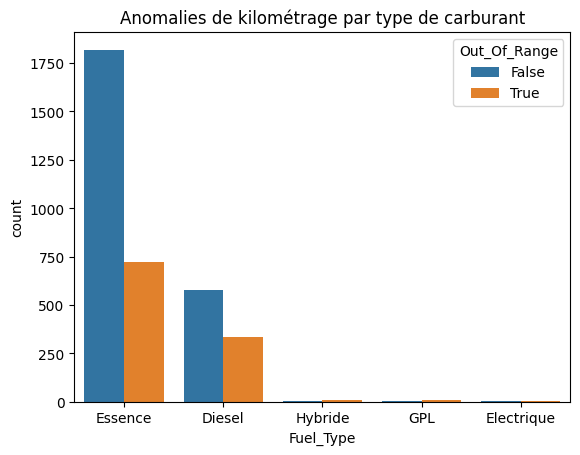

In [45]:
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


# Année actuelle
current_year = datetime.now().year

# Calcul de l'âge des voitures
NewDF['Age'] = current_year - NewDF['Year']

# Intervalles annuels en km pour chaque type de carburant
mileage_intervals = {
    "Essence": (2000, 10000000000),
    "Diesel": (2000, 10000000000),
    "GPL": (12000, 18000),
    "Électrique": (10000, 15000),
    "Hybride": (12000, 20000),
}

# Fonction pour calculer les bornes de kilométrage attendu
def calculate_expected_mileage(row):
    fuel = row['Fuel_Type']
    age = row['Age']
    if fuel in mileage_intervals:
        min_per_year, max_per_year = mileage_intervals[fuel]
        return (age * min_per_year, age * max_per_year)
    return (0, 0)  # Si le type de carburant n'est pas connu

# Ajouter les colonnes pour les bornes minimales et maximales
NewDF['Expected_Mileage_Min'], NewDF['Expected_Mileage_Max'] = zip(
    *NewDF.apply(calculate_expected_mileage, axis=1)
)

# Identifier les voitures avec un kilométrage hors des bornes
NewDF['Out_Of_Range'] = ~(
    (NewDF['Mileage'] >= NewDF['Expected_Mileage_Min']) &
    (NewDF['Mileage'] <= NewDF['Expected_Mileage_Max'])
)

# Compter les voitures hors intervalle par Fuel_Type
out_of_range_counts = NewDF[NewDF['Out_Of_Range']].groupby('Fuel_Type').size()

# Résultat
print("Nombre de voitures hors des intervalles par Fuel_Type :")
print(out_of_range_counts)

# Distribution des anomalies par Fuel_Type
sns.countplot(data=NewDF, x='Fuel_Type', hue='Out_Of_Range')
plt.title('Anomalies de kilométrage par type de carburant')
plt.show()


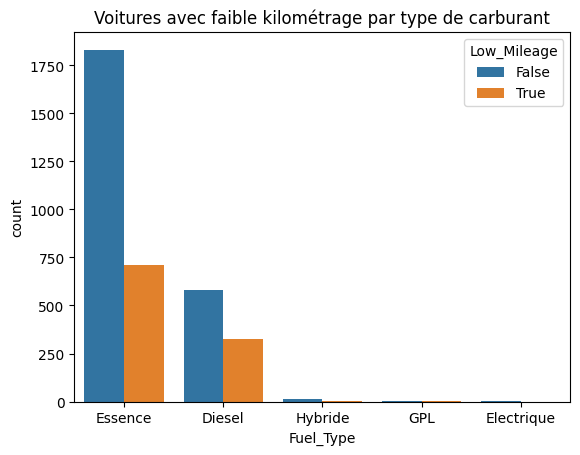

,Car_Name,Brand,Model,Status,Year,Fuel_Type,Transmission,Horse_power,Cylinder,Mileage,Color,Price,Age
0,alfa romeo 156 à echange ou vendre,Alfa Romeo,156,occasion,2000.0,Essence,Manuelle,8.0,1.8,300000.0,noir,111.11,24.0
1,Alfa Romeo 159,Alfa Romeo,159,occasion,2008.0,Diesel,Manuelle,6.0,1.9,200000.0,noir,26.50,16.0
2,Giulietta,Alfa Romeo,Giulietta,occasion,2015.0,Essence,Manuelle,7.0,1.4,170025.0,noir,38.00,9.0
3,Alfa Giulietta,Alfa Romeo,Giulietta,occasion,2015.0,Essence,Automatique,9.0,1.4,182000.0,rouge,43.00,9.0
4,2010 Alfa Romeo MiTo quadrifoglio,Alfa Romeo,Mito,occasion,2010.0,Essence,Manuelle,9.0,1.4,150000.0,violet,36.90,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,Vento tayara,Volkswagen,Vento,occasion,1994.0,Diesel,Manuelle,6.0,1.2,116683.0,noir,16.30,30.0
3493,Bonne occasion,Volkswagen,Vento,occasion,1995.0,Diesel,Manuelle,5.0,1.2,60000.0,blanc,13.00,29.0
3494,À vendre Volvo S40,Volvo,S40,occasion,2009.0,Essence,Manuelle,6.0,1.0,243298.0,bleu,23.00,15.0
3495,Particulier vent sa Volvo s60,Volvo,S60,occasion,2014.0,Essence,Manuelle,8.0,1.6,186000.0,noir,37.50,10.0


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Identifier les voitures avec un Mileage inférieur à 2000 * Age
NewDF['Low_Mileage'] = NewDF['Mileage'] < (2000 * NewDF['Age'])

# Calcul de la moyenne de Mileage par Brand (avec conversion en int)
average_mileage_by_brand = NewDF.groupby('Brand')['Mileage'].mean().astype(int)

# Remplacer le Mileage des voitures concernées par la moyenne entière de leur Brand
NewDF.loc[NewDF['Low_Mileage'], 'Mileage'] = NewDF.loc[
    NewDF['Low_Mileage'], 'Brand'
].map(average_mileage_by_brand)

# Distribution des anomalies par Fuel_Type
sns.countplot(data=NewDF, x='Fuel_Type', hue='Low_Mileage')
plt.title('Voitures avec faible kilométrage par type de carburant')
plt.show()

# Conserver les 13 premieres colonnes
NewDF = NewDF.iloc[:, :13]

# Résultat final
NewDF


In [47]:
#afficher les voitures dont le kilometrage est nul
NewDF[NewDF['Status'] == 'neuf']

,Car_Name,Brand,Model,Status,Year,Fuel_Type,Transmission,Horse_power,Cylinder,Mileage,Color,Price,Age
7,à vendre Clio alpine v16 hybride,Renault,Clio,neuf,2024.0,Hybride,Automatique,5.0,1.6,5300.0,bleu,110.0,0.0
10,80unique en tunisie,Audi,80,neuf,1989.0,Essence,Manuelle,7.0,1.8,300000.0,noir,18.0,35.0
13,A1,Audi,A1,neuf,2012.0,Essence,Manuelle,5.0,1.2,179000.0,rouge,35.5,12.0
18,Audi A3 Sline,Audi,A3,neuf,2017.0,Essence,Automatique,6.0,1.2,150000.0,gris,68.0,7.0
19,Audi A3 Sline,Audi,A3,neuf,2018.0,Essence,Automatique,6.0,1.2,120000.0,gris,76.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,Polo virtus,Volkswagen,Polo,neuf,2024.0,Essence,Manuelle,5.0,1.0,24000.0,blanc,22.0,0.0
3468,scirocco,Volkswagen,Scirocco,neuf,2011.0,Essence,Automatique,9.0,1.4,198000.0,gris,35.0,13.0
3471,Lounge Business,Volkswagen,Troc,neuf,2019.0,Essence,Manuelle,6.0,1.0,49000.0,gris,95.0,5.0
3472,NaN,Volkswagen,Troc,neuf,2019.0,Essence,Manuelle,6.0,1.0,116683.0,bleu,74.0,5.0


In [48]:
import pandas as pd

# Modifier les voitures avec Status 'neuf' et Mileage différent de 0
NewDF.loc[(NewDF['Status'] == 'neuf') & (NewDF['Mileage'] != 0), 'Status'] = 'occasion'

# Résultat
NewDF
NewDF[NewDF['Status'] == 'neuf']

,Car_Name,Brand,Model,Status,Year,Fuel_Type,Transmission,Horse_power,Cylinder,Mileage,Color,Price,Age
668,Glory 500,DFSK,Glory 500,neuf,2024.0,Essence,Manuelle,7.0,1.5,0.0,blanc,67.9,0.0
669,Réduction KH01,DFSK,K01H,neuf,2024.0,Essence,Manuelle,6.0,1.1,0.0,gris,34.4,0.0
2977,Soussa,Tesla,Model X,neuf,2024.0,Electrique,Automatique,5.0,1.0,0.0,rouge,60.0,0.0


In [49]:
# Ajouter colonnes MileagePerYear et renommer Cylinder par EngineCapacity
NewDF['MileagePerYear'] = NewDF['Mileage'] / NewDF['Age']
NewDF = NewDF.rename(columns={'Cylinder': 'EngineCapacity'})

NewDF

,Car_Name,Brand,Model,Status,Year,Fuel_Type,Transmission,Horse_power,EngineCapacity,Mileage,Color,Price,Age,MileagePerYear
0,alfa romeo 156 à echange ou vendre,Alfa Romeo,156,occasion,2000.0,Essence,Manuelle,8.0,1.8,300000.0,noir,111.11,24.0,12500.000000
1,Alfa Romeo 159,Alfa Romeo,159,occasion,2008.0,Diesel,Manuelle,6.0,1.9,200000.0,noir,26.50,16.0,12500.000000
2,Giulietta,Alfa Romeo,Giulietta,occasion,2015.0,Essence,Manuelle,7.0,1.4,170025.0,noir,38.00,9.0,18891.666667
3,Alfa Giulietta,Alfa Romeo,Giulietta,occasion,2015.0,Essence,Automatique,9.0,1.4,182000.0,rouge,43.00,9.0,20222.222222
4,2010 Alfa Romeo MiTo quadrifoglio,Alfa Romeo,Mito,occasion,2010.0,Essence,Manuelle,9.0,1.4,150000.0,violet,36.90,14.0,10714.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,Vento tayara,Volkswagen,Vento,occasion,1994.0,Diesel,Manuelle,6.0,1.2,116683.0,noir,16.30,30.0,3889.433333
3493,Bonne occasion,Volkswagen,Vento,occasion,1995.0,Diesel,Manuelle,5.0,1.2,60000.0,blanc,13.00,29.0,2068.965517
3494,À vendre Volvo S40,Volvo,S40,occasion,2009.0,Essence,Manuelle,6.0,1.0,243298.0,bleu,23.00,15.0,16219.866667
3495,Particulier vent sa Volvo s60,Volvo,S60,occasion,2014.0,Essence,Manuelle,8.0,1.6,186000.0,noir,37.50,10.0,18600.000000


In [50]:
# Effacer les colonnes "Mileage", "Year", "Color" et "Car_Name"
NewDF = NewDF.drop(columns=['Mileage', 'Year', 'Color', 'Car_Name'])
NewDF

,Brand,Model,Status,Fuel_Type,Transmission,Horse_power,EngineCapacity,Price,Age,MileagePerYear
0,Alfa Romeo,156,occasion,Essence,Manuelle,8.0,1.8,111.11,24.0,12500.000000
1,Alfa Romeo,159,occasion,Diesel,Manuelle,6.0,1.9,26.50,16.0,12500.000000
2,Alfa Romeo,Giulietta,occasion,Essence,Manuelle,7.0,1.4,38.00,9.0,18891.666667
3,Alfa Romeo,Giulietta,occasion,Essence,Automatique,9.0,1.4,43.00,9.0,20222.222222
4,Alfa Romeo,Mito,occasion,Essence,Manuelle,9.0,1.4,36.90,14.0,10714.285714
...,...,...,...,...,...,...,...,...,...,...
3492,Volkswagen,Vento,occasion,Diesel,Manuelle,6.0,1.2,16.30,30.0,3889.433333
3493,Volkswagen,Vento,occasion,Diesel,Manuelle,5.0,1.2,13.00,29.0,2068.965517
3494,Volvo,S40,occasion,Essence,Manuelle,6.0,1.0,23.00,15.0,16219.866667
3495,Volvo,S60,occasion,Essence,Manuelle,8.0,1.6,37.50,10.0,18600.000000


In [51]:
# Placer les colonnes "Age" et "MileagePerYear" avant la colonne "Price"
NewDF.insert(NewDF.columns.get_loc('Price'), 'Age', NewDF.pop('Age'))
NewDF.insert(NewDF.columns.get_loc('Price'), 'MileagePerYear', NewDF.pop('MileagePerYear'))

NewDF

,Brand,Model,Status,Fuel_Type,Transmission,Horse_power,EngineCapacity,Age,MileagePerYear,Price
0,Alfa Romeo,156,occasion,Essence,Manuelle,8.0,1.8,24.0,12500.000000,111.11
1,Alfa Romeo,159,occasion,Diesel,Manuelle,6.0,1.9,16.0,12500.000000,26.50
2,Alfa Romeo,Giulietta,occasion,Essence,Manuelle,7.0,1.4,9.0,18891.666667,38.00
3,Alfa Romeo,Giulietta,occasion,Essence,Automatique,9.0,1.4,9.0,20222.222222,43.00
4,Alfa Romeo,Mito,occasion,Essence,Manuelle,9.0,1.4,14.0,10714.285714,36.90
...,...,...,...,...,...,...,...,...,...,...
3492,Volkswagen,Vento,occasion,Diesel,Manuelle,6.0,1.2,30.0,3889.433333,16.30
3493,Volkswagen,Vento,occasion,Diesel,Manuelle,5.0,1.2,29.0,2068.965517,13.00
3494,Volvo,S40,occasion,Essence,Manuelle,6.0,1.0,15.0,16219.866667,23.00
3495,Volvo,S60,occasion,Essence,Manuelle,8.0,1.6,10.0,18600.000000,37.50


In [52]:
# Vérifier et remplacer les valeurs NaN et inf dans 'EngineCapacity'
NewDF['EngineCapacity'] = NewDF['EngineCapacity'].replace([float('inf'), float('-inf')], None)
NewDF['EngineCapacity'] = NewDF['EngineCapacity'].fillna(0) 

# Convertir la colonne 'EngineCapacity' en float
NewDF['EngineCapacity'] = NewDF['EngineCapacity'].astype(float)

# Vérifier les autres conversions
NewDF['MileagePerYear'] = NewDF['MileagePerYear'].replace([float('inf'), float('-inf')], None)
NewDF['MileagePerYear'] = NewDF['MileagePerYear'].fillna(0)
NewDF['Age'] = NewDF['Age'].fillna(0)

# Convertir 'MileagePerYear' et 'Age' en entier
NewDF['MileagePerYear'] = NewDF['MileagePerYear'].astype(int)
NewDF['Age'] = NewDF['Age'].astype(int)

NewDF


,Brand,Model,Status,Fuel_Type,Transmission,Horse_power,EngineCapacity,Age,MileagePerYear,Price
0,Alfa Romeo,156,occasion,Essence,Manuelle,8.0,1.8,24,12500,111.11
1,Alfa Romeo,159,occasion,Diesel,Manuelle,6.0,1.9,16,12500,26.50
2,Alfa Romeo,Giulietta,occasion,Essence,Manuelle,7.0,1.4,9,18891,38.00
3,Alfa Romeo,Giulietta,occasion,Essence,Automatique,9.0,1.4,9,20222,43.00
4,Alfa Romeo,Mito,occasion,Essence,Manuelle,9.0,1.4,14,10714,36.90
...,...,...,...,...,...,...,...,...,...,...
3492,Volkswagen,Vento,occasion,Diesel,Manuelle,6.0,1.2,30,3889,16.30
3493,Volkswagen,Vento,occasion,Diesel,Manuelle,5.0,1.2,29,2068,13.00
3494,Volvo,S40,occasion,Essence,Manuelle,6.0,1.0,15,16219,23.00
3495,Volvo,S60,occasion,Essence,Manuelle,8.0,1.6,10,18600,37.50


In [53]:
# Effacer la colonne "EngineCapacity"
NewDF = NewDF.drop(columns=['EngineCapacity'])

NewDF

,Brand,Model,Status,Fuel_Type,Transmission,Horse_power,Age,MileagePerYear,Price
0,Alfa Romeo,156,occasion,Essence,Manuelle,8.0,24,12500,111.11
1,Alfa Romeo,159,occasion,Diesel,Manuelle,6.0,16,12500,26.50
2,Alfa Romeo,Giulietta,occasion,Essence,Manuelle,7.0,9,18891,38.00
3,Alfa Romeo,Giulietta,occasion,Essence,Automatique,9.0,9,20222,43.00
4,Alfa Romeo,Mito,occasion,Essence,Manuelle,9.0,14,10714,36.90
...,...,...,...,...,...,...,...,...,...
3492,Volkswagen,Vento,occasion,Diesel,Manuelle,6.0,30,3889,16.30
3493,Volkswagen,Vento,occasion,Diesel,Manuelle,5.0,29,2068,13.00
3494,Volvo,S40,occasion,Essence,Manuelle,6.0,15,16219,23.00
3495,Volvo,S60,occasion,Essence,Manuelle,8.0,10,18600,37.50


In [54]:
#afficher les types des colonnes 
NewDF.dtypes

Brand              object
Model              object
Status             object
Fuel_Type          object
Transmission       object
Horse_power       float64
Age                 int64
MileagePerYear      int64
Price             float64
dtype: object

In [55]:
#export NewDF to csv (rename it "CleanedDF.csv")
NewDF.to_csv('CleanedDF.csv')

In [56]:
NewDF.head()

,Brand,Model,Status,Fuel_Type,Transmission,Horse_power,Age,MileagePerYear,Price
0,Alfa Romeo,156,occasion,Essence,Manuelle,8.0,24,12500,111.11
1,Alfa Romeo,159,occasion,Diesel,Manuelle,6.0,16,12500,26.50
2,Alfa Romeo,Giulietta,occasion,Essence,Manuelle,7.0,9,18891,38.00
3,Alfa Romeo,Giulietta,occasion,Essence,Automatique,9.0,9,20222,43.00
4,Alfa Romeo,Mito,occasion,Essence,Manuelle,9.0,14,10714,36.90


In [57]:
#import NewCars(from automobile)
NewCars = pd.read_csv('NewCars.csv')

In [58]:
NewCars.head()

,Brand,Model,Status,Fuel_type,Transmission,Puissance fiscale,Age,MileagePerYear,Price
0,alfa-romeo,giulia 2.0-turbo-bva-super,neuf,Essence,Automatique,11CV,0,0,198 000DTTTC
1,alfa-romeo,stelvio 2.0-turbo-q4-bva,neuf,Essence,Automatique,17CV,0,0,265 000DTTTC
2,audi,a3-sportback 35-tfsi-advanced-line,neuf,Essence,Automatique,8CV,0,0,145 000DTTTC
3,audi,a3-berline 35-tfsi-business-extended,neuf,Essence,Automatique,8CV,0,0,149 000DTTTC
4,audi,a4 35-tfsi-s-tronic-business-line-plus,neuf,Essence,Automatique,8CV,0,0,198 000DTTTC


In [59]:
#remove the '-' between the words in Brand Column and capitalize the first letter of each word
NewCars['Brand'] = NewCars['Brand'].str.replace('-', ' ').str.title()

In [60]:
#for the Model column take only the first word before the first space and capitalize the first letter of each word
NewCars['Model'] = NewCars['Model'].str.split().str[0].str.title()

In [61]:
#convert Price to float and remove letters and symbols
NewCars['Price'] = NewCars['Price'].str.replace(r'[^0-9.]', '', regex=True).astype(int)
NewCars.head()

,Brand,Model,Status,Fuel_type,Transmission,Puissance fiscale,Age,MileagePerYear,Price
0,Alfa Romeo,Giulia,neuf,Essence,Automatique,11CV,0,0,198000
1,Alfa Romeo,Stelvio,neuf,Essence,Automatique,17CV,0,0,265000
2,Audi,A3-Sportback,neuf,Essence,Automatique,8CV,0,0,145000
3,Audi,A3-Berline,neuf,Essence,Automatique,8CV,0,0,149000
4,Audi,A4,neuf,Essence,Automatique,8CV,0,0,198000


In [62]:
#changer ces brands : A3-Sportback → A3,A3-Berline → A3,Serie-3 → Serie 3, Serie-4-Gran-Coupe → Serie 4 Coupe,Serie-4-Coupe → Serie 4 Coupe,Serie-2-Gran-Coupe → Serie 2 Gran Tourer,X1-Hybride → X1,X3-Hybride-Rechargeable → X3,308-Gt → 308,Hilux-Simple-Cabine → Hilux
corrections = {
    'A3-Sportback': 'A3',
    'A3-Berline': 'A3',
    'Serie-3': 'Serie 3',
    'Serie-4-Gran-Coupe': 'Serie 4 Coupe',
    'Serie-4-Coupe': 'Serie 4 Coupe',
    'Serie-2-Gran-Coupe': 'Serie 2 Gran Tourer',
    'X1-Hybride': 'X1',
    'X3-Hybride-Rechargeable': 'X3',
    '308-Gt': '308',
    'Hilux-Simple-Cabine': 'Hilux'
}

# Appliquer les corrections à la colonne 'Brand'
NewCars['Model'] = NewCars['Model'].replace(corrections)

In [63]:
NewCars.head()

,Brand,Model,Status,Fuel_type,Transmission,Puissance fiscale,Age,MileagePerYear,Price
0,Alfa Romeo,Giulia,neuf,Essence,Automatique,11CV,0,0,198000
1,Alfa Romeo,Stelvio,neuf,Essence,Automatique,17CV,0,0,265000
2,Audi,A3,neuf,Essence,Automatique,8CV,0,0,145000
3,Audi,A3,neuf,Essence,Automatique,8CV,0,0,149000
4,Audi,A4,neuf,Essence,Automatique,8CV,0,0,198000


In [64]:
#remplacer les '-' entre les mots de brand par un espace
NewCars['Model'] = NewCars['Model'].str.replace('-', ' ')

In [65]:
NewCars['Model'].unique()

array(['Giulia', 'Stelvio', 'A3', 'A4', 'A6', 'Q2', 'Q3', 'Q3 Sportback',
       'Q7', 'Q8 E Tron', 'Q8 Sportback E Tron', 'E Tron Gt', 'Bee',
       'Evan', 'Bestune T77', 'Serie 1 5P', 'Serie 2 Gran Tourer',
       'Serie 3', 'Serie 4 Coupe', 'Serie 5', 'Serie 7', 'X1', 'X2', 'X3',
       'X4', 'X5 Hybride', 'I4', 'Ix1', 'Ix3', 'I5', 'Ix', 'Dolphin',
       'King', 'Atto 3', 'Song Plus', 'Tang Ev', 'New Star',
       'Star Truck Double Cabine', 'Hunter', 'Tiggo 1X Populaire',
       'Tiggo 3X', 'Arrizo 5', 'Tiggo 7', 'Tiggo 8 Pro', 'Groove',
       'Captiva', 'Equinox', 'C3 Populaire', 'C4 X', 'Berlingo Van',
       'Jumpy Fourgon', 'Jumper', 'Berlingo Multispace', 'Leon',
       'Formentor', 'Sandero Stepway', 'Sandero', 'Logan', 'Duster',
       'Glory 500', 'Glory 580', 'Glory Ix5', 'K01S', 'K01H', 'K02S',
       'C31', 'C32', 'Rich 6', 'T5 Evo', 'Besturn X40', 'Tipo Berline',
       '500', 'Fiorino Combi', 'Doblo', 'Ducato', 'F22 S', 'F22',
       'F22 Max', 'Everest', 'Ranger', 

In [66]:
#Afficher tous les models de cars
NewDF['Model'].unique()

array(['156', '159', 'Giulietta', 'Mito', 'Clio', '100', '50', '80', 'A1',
       'A3', 'A4', 'A5', 'A6', 'Q7', 'Q2', 'Q3', 'Q5', 'S4', 'Xénon',
       'Leon', 'Golf', '16', 'Master', '106', '208', 'R19', 'Polo',
       'Laguna', 'S50', 'C3', 'QQ', 'Tiggo', 'H6', 'Iris', 'Picanto',
       'Grand Tiger', 'Tiguan', 'Jolion', 'SX3', 'GC6', 'S2', 'S3', 'E34',
       'Serie 3', 'F10', 'F30', 'X2', 'M3', 'Serie 1',
       'Serie 2 Active Tourer', 'Serie 2 Cabriolet',
       'Serie 2 Gran Tourer', 'Serie 4 Coupe', 'Serie 5', 'Serie 6',
       'Serie 7', 'X1', 'X3', 'X5', 'X6', 'i3', 'Optra', 'Aveo', 'Sonic',
       'Captiva', 'Cruze', 'Lacetti', 'Matiz', 'Spark', 'Trax', 'Xsara',
       'Jumper', 'Nemo', 'C4', 'Ax', 'Berlingo', 'Bx', 'Celysee', 'C1',
       'C15', 'C2', 'C5', 'C8', 'DS5', 'Ds3', 'Ds4', 'Gsa', 'Jumpy',
       'Nemo Combi', 'Saxo', 'Zx', 'Formentor', 'Glory 500', 'K01H',
       'Docker', 'Dokker', 'Duster', 'Logan', 'Sandero', 'H2', 'Dmax',
       '500', '600', '5', 'Punto Pop'

In [67]:
#renommer le nom de colonne Puissance fiscale en Horse_power puis enlever 'CV'
NewCars = NewCars.rename(columns={'Puissance fiscale': 'Horse_power'})
NewCars['Horse_power'] = NewCars['Horse_power'].str.replace('CV', '')
NewCars.head()

,Brand,Model,Status,Fuel_type,Transmission,Horse_power,Age,MileagePerYear,Price
0,Alfa Romeo,Giulia,neuf,Essence,Automatique,11,0,0,198000
1,Alfa Romeo,Stelvio,neuf,Essence,Automatique,17,0,0,265000
2,Audi,A3,neuf,Essence,Automatique,8,0,0,145000
3,Audi,A3,neuf,Essence,Automatique,8,0,0,149000
4,Audi,A4,neuf,Essence,Automatique,8,0,0,198000


In [68]:
#afficher les types des colonnes de NewDF
NewDF.dtypes

Brand              object
Model              object
Status             object
Fuel_Type          object
Transmission       object
Horse_power       float64
Age                 int64
MileagePerYear      int64
Price             float64
dtype: object

In [69]:
#changer les prix de NewDF en int64 en multiplieant par 1000
NewDF['Price'] = NewDF['Price'] * 1000
#afficher les prix de NewDF
NewDF['Price']

0       111110.0
1        26500.0
2        38000.0
3        43000.0
4        36900.0
          ...   
3492     16300.0
3493     13000.0
3494     23000.0
3495     37500.0
3496     13000.0
Name: Price, Length: 3475, dtype: float64

In [70]:
#supprimer les valeurs 'N.C' et 'N.C.CV'
NewCars = NewCars[~NewCars['Horse_power'].isin(['N.C', 'N.C.'])]

# Convertir la colonne 'Horse_power' en float
NewCars['Horse_power'] = NewCars['Horse_power'].astype(float)

# Afficher les premières lignes pour vérifier
NewCars.head()

,Brand,Model,Status,Fuel_type,Transmission,Horse_power,Age,MileagePerYear,Price
0,Alfa Romeo,Giulia,neuf,Essence,Automatique,11.0,0,0,198000
1,Alfa Romeo,Stelvio,neuf,Essence,Automatique,17.0,0,0,265000
2,Audi,A3,neuf,Essence,Automatique,8.0,0,0,145000
3,Audi,A3,neuf,Essence,Automatique,8.0,0,0,149000
4,Audi,A4,neuf,Essence,Automatique,8.0,0,0,198000


In [71]:
#rename Fuel_type to Fuel_Type
NewCars = NewCars.rename(columns={'Fuel_type': 'Fuel_Type'})

In [72]:
NewCars.head()

,Brand,Model,Status,Fuel_Type,Transmission,Horse_power,Age,MileagePerYear,Price
0,Alfa Romeo,Giulia,neuf,Essence,Automatique,11.0,0,0,198000
1,Alfa Romeo,Stelvio,neuf,Essence,Automatique,17.0,0,0,265000
2,Audi,A3,neuf,Essence,Automatique,8.0,0,0,145000
3,Audi,A3,neuf,Essence,Automatique,8.0,0,0,149000
4,Audi,A4,neuf,Essence,Automatique,8.0,0,0,198000


In [73]:
#concatenate the two dataframes
FinalDF = pd.concat([NewDF, NewCars], ignore_index=True)
FinalDF

,Brand,Model,Status,Fuel_Type,Transmission,Horse_power,Age,MileagePerYear,Price
0,Alfa Romeo,156,occasion,Essence,Manuelle,8.0,24,12500,111110.0
1,Alfa Romeo,159,occasion,Diesel,Manuelle,6.0,16,12500,26500.0
2,Alfa Romeo,Giulietta,occasion,Essence,Manuelle,7.0,9,18891,38000.0
3,Alfa Romeo,Giulietta,occasion,Essence,Automatique,9.0,9,20222,43000.0
4,Alfa Romeo,Mito,occasion,Essence,Manuelle,9.0,14,10714,36900.0
...,...,...,...,...,...,...,...,...,...
3915,Volvo,S90,neuf,Essence,Automatique,15.0,0,0,273900.0
3916,Volvo,S90,neuf,Essence,Automatique,15.0,0,0,289900.0
3917,Volvo,Xc90,neuf,Essence,Automatique,15.0,0,0,375900.0
3918,Volvo,Xc90,neuf,Essence,Automatique,20.0,0,0,449900.0


In [74]:
FinalDF['Brand'].unique()

array(['Alfa Romeo', 'Renault', 'Audi', 'Tata', 'Cupra', 'Volkswagen',
       'Wallyscar', 'Peugeot', 'Dongfeng', 'Citroen', 'Chery', 'Haval',
       'Kia', 'ZXAUTO', 'Geely', 'Baic', 'Bmw', 'Buick', 'Chevrolet',
       'Corvette', 'DFSK', 'Dacia', 'Donkervoort', 'Isuzu', 'Ds', 'Fiat',
       'Ford', 'Great Wall', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar',
       'Jeep', 'Lada', 'Land Rover', 'Mahindra', 'Maserati', 'Mazda',
       'Mercedes', 'Mg', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Suzuki',
       'PGO', 'Piaggio', 'Porsche', 'Seat', 'Shuanghuan', 'Skoda',
       'Smart', 'Ssangyong', 'Talbot', 'Tesla', 'Toyota', 'FAW', 'Volvo',
       'Bako', 'Bestune', 'Byd', 'Changan', 'Dfsk', 'Faw', 'Foday',
       'Gac Motor', 'Jac', 'Mercedes Benz'], dtype=object)

In [75]:
#changer la valeur de 'Brand' pour 'Mercedes Benz' en 'Mercedes' et 'FAW' en 'Faw'

FinalDF['Brand'] = FinalDF['Brand'].replace('FAW', 'Faw')
FinalDF['Brand'] = FinalDF['Brand'].replace('Mercedes Benz', 'Mercedes')

FinalDF['Brand'].unique()

array(['Alfa Romeo', 'Renault', 'Audi', 'Tata', 'Cupra', 'Volkswagen',
       'Wallyscar', 'Peugeot', 'Dongfeng', 'Citroen', 'Chery', 'Haval',
       'Kia', 'ZXAUTO', 'Geely', 'Baic', 'Bmw', 'Buick', 'Chevrolet',
       'Corvette', 'DFSK', 'Dacia', 'Donkervoort', 'Isuzu', 'Ds', 'Fiat',
       'Ford', 'Great Wall', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar',
       'Jeep', 'Lada', 'Land Rover', 'Mahindra', 'Maserati', 'Mazda',
       'Mercedes', 'Mg', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Suzuki',
       'PGO', 'Piaggio', 'Porsche', 'Seat', 'Shuanghuan', 'Skoda',
       'Smart', 'Ssangyong', 'Talbot', 'Tesla', 'Toyota', 'Faw', 'Volvo',
       'Bako', 'Bestune', 'Byd', 'Changan', 'Dfsk', 'Foday', 'Gac Motor',
       'Jac'], dtype=object)

In [76]:
#supprimer les lignes redondantes
FinalDF = FinalDF.drop_duplicates()

In [77]:
#Export FinalDF to csv (rename it "FinalDF.csv")
FinalDF.to_csv('FinalDF.csv')

In [78]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

df_encoded = df.copy()

# Encode categorical variables
categorical_columns = ['Brand', 'Model', 'Status', 'Fuel_Type', 'Transmission']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Standardize numerical features
numerical_columns = ['Horse_power', 'Age', 'MileagePerYear', 'Price']
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Ensure numerical columns are floats/integers
df_encoded[numerical_columns] = df_encoded[numerical_columns].astype(float)

df_encoded

KeyError: "['Age', 'MileagePerYear'] not in index"

In [ ]:
# Check label encoding mapping
for col, encoder in label_encoders.items():
    print(f"\n{col} Encoding Mapping:")
    for label, code in zip(encoder.classes_, encoder.transform(encoder.classes_)):
        print(f"{label}: {code}")

# Check numerical columns statistics
print("\nNumerical Columns Statistics:")
print(df_encoded[numerical_columns].describe())

# Verify scaling
print("\nVerification of Scaling:")
for col in numerical_columns:
    mean = df_encoded[col].mean()
    std = df_encoded[col].std()
    print(f"{col} - Mean: {mean:.4f}, Standard Deviation: {std:.4f}")

# Check for missing values
print("\nMissing Values:")
print(df_encoded.isnull().sum())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of scaled numerical features
plt.figure(figsize=(10, 6))
df_encoded[numerical_columns].boxplot()
plt.title('Boxplot of Scaled Numerical Features')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1800x700 with 0 Axes>

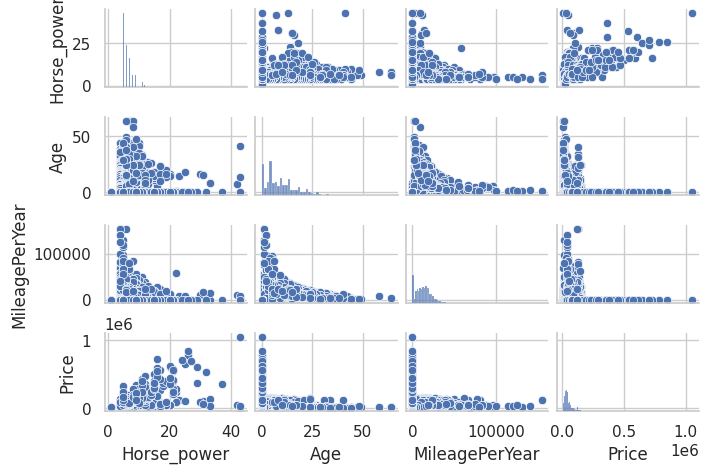

In [75]:
#Pairplot 
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
g=sns.pairplot(FinalDF, height=1.2, aspect=1.5)
plt.yticks(rotation=90); 
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9158155e-c82c-4f23-93c0-dcd070a7ff4c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>